# Imports and palette

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
import os

palette = sns.color_palette("vlag", as_cmap=True)

# Data wrangling and tidying
Attribute Information:<br>
class: edible=e, poisonous=p <br>
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s <br>
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s <br>
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y <br>
bruises: bruises=t,no=f <br>
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s <br>
gill-attachment: attached=a,descending=d,free=f,notched=n <br>
gill-spacing: close=c,crowded=w,distant=d <br>
gill-size: broad=b,narrow=n <br>
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y <br>
stalk-shape: enlarging=e,tapering=t <br>
stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=? <br>
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s <br>
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s <br>
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y <br>
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y <br>
veil-type: partial=p,universal=u <br>
veil-color: brown=n,orange=o,white=w,yellow=y <br>
ring-number: none=n,one=o,two=t <br>
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z <br>
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y <br>
population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y <br>
habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d <br>

8124 8084


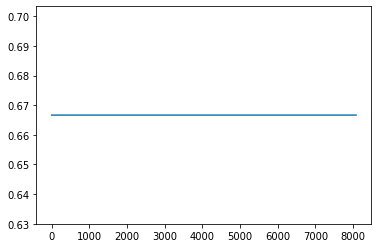

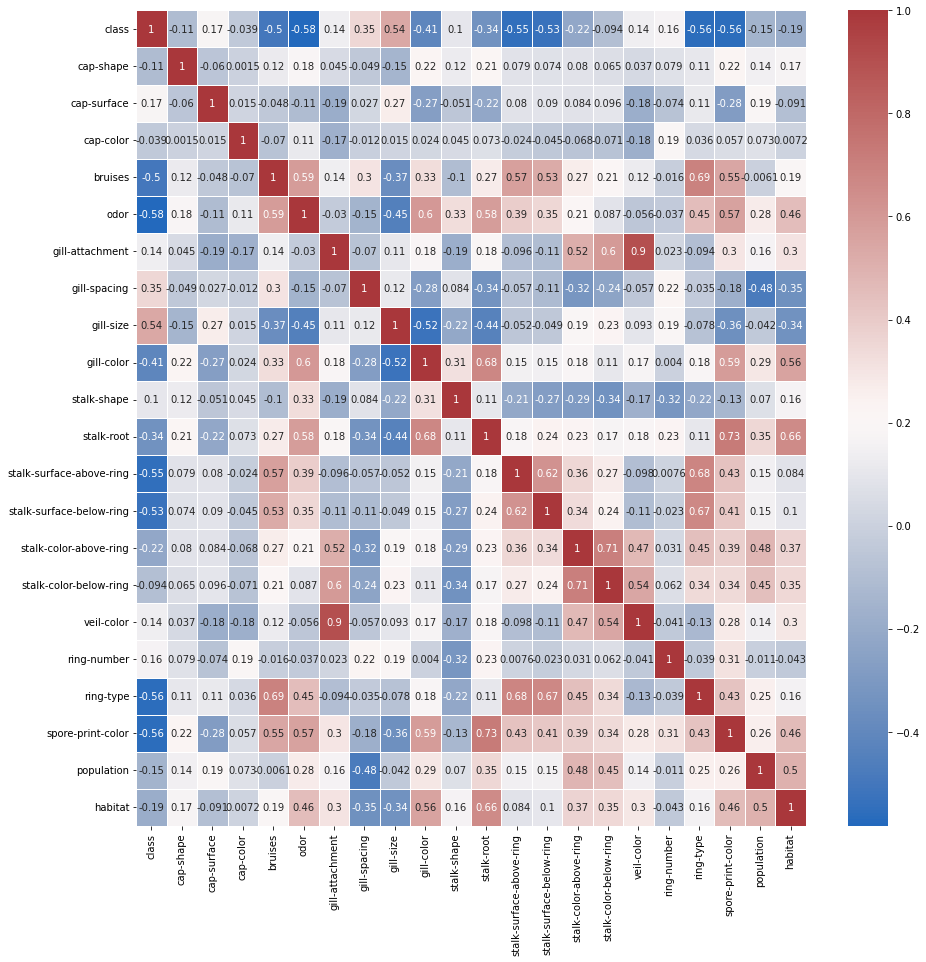

In [11]:
pwd = os.getcwd()
df = pd.read_csv(pwd + '\data\mushrooms.csv')
df = df.drop('veil-type', axis=1)

def frame_strings_to_numbers(df):
    df_modified = df.copy()
    for col in  df_modified.columns:
        # print("Column: ", col)
        unique_values =  df_modified[col].unique()
        new_name_dict = {}
        for i in range(0, len(unique_values)):
            new_name_dict[unique_values[i]] = i
        # print(new_name_dict)
        df_modified[col] = df_modified[col].map(lambda elem: new_name_dict[str(elem)])
    return df_modified

def check_for_anomaly(df):
    anomaly_detector = NearestNeighbors(n_neighbors = 3)
    anomaly_detector.fit(df)

    distances, indexes = anomaly_detector.kneighbors(df)

    # plt.plot(distances.mean(axis = 1))

    df_modified = df[~df.index.isin(np.where(distances.mean(axis = 1) > 0.8)[0])].reset_index(drop=True)
    
    print(len(df), len(df_modified))
    
    distances, indexes = anomaly_detector.kneighbors(df_modified)

    plt.plot(distances.mean(axis = 1))
    
    return df_modified


df_nums = frame_strings_to_numbers(df)

df_nums_smooth = check_for_anomaly(df_nums)


df_corr = df_nums_smooth.corr()

plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=True, linewidths=.5, cmap=palette);

# Building decision tree

      predicted  real
1422          1     1
953           1     1
2293          1     1
4791          0     0
2696          1     1
...         ...   ...
3884          1     1
6837          1     1
35            1     1
7742          0     0
5018          0     0

[4042 rows x 2 columns]
Accuracy:  1.0


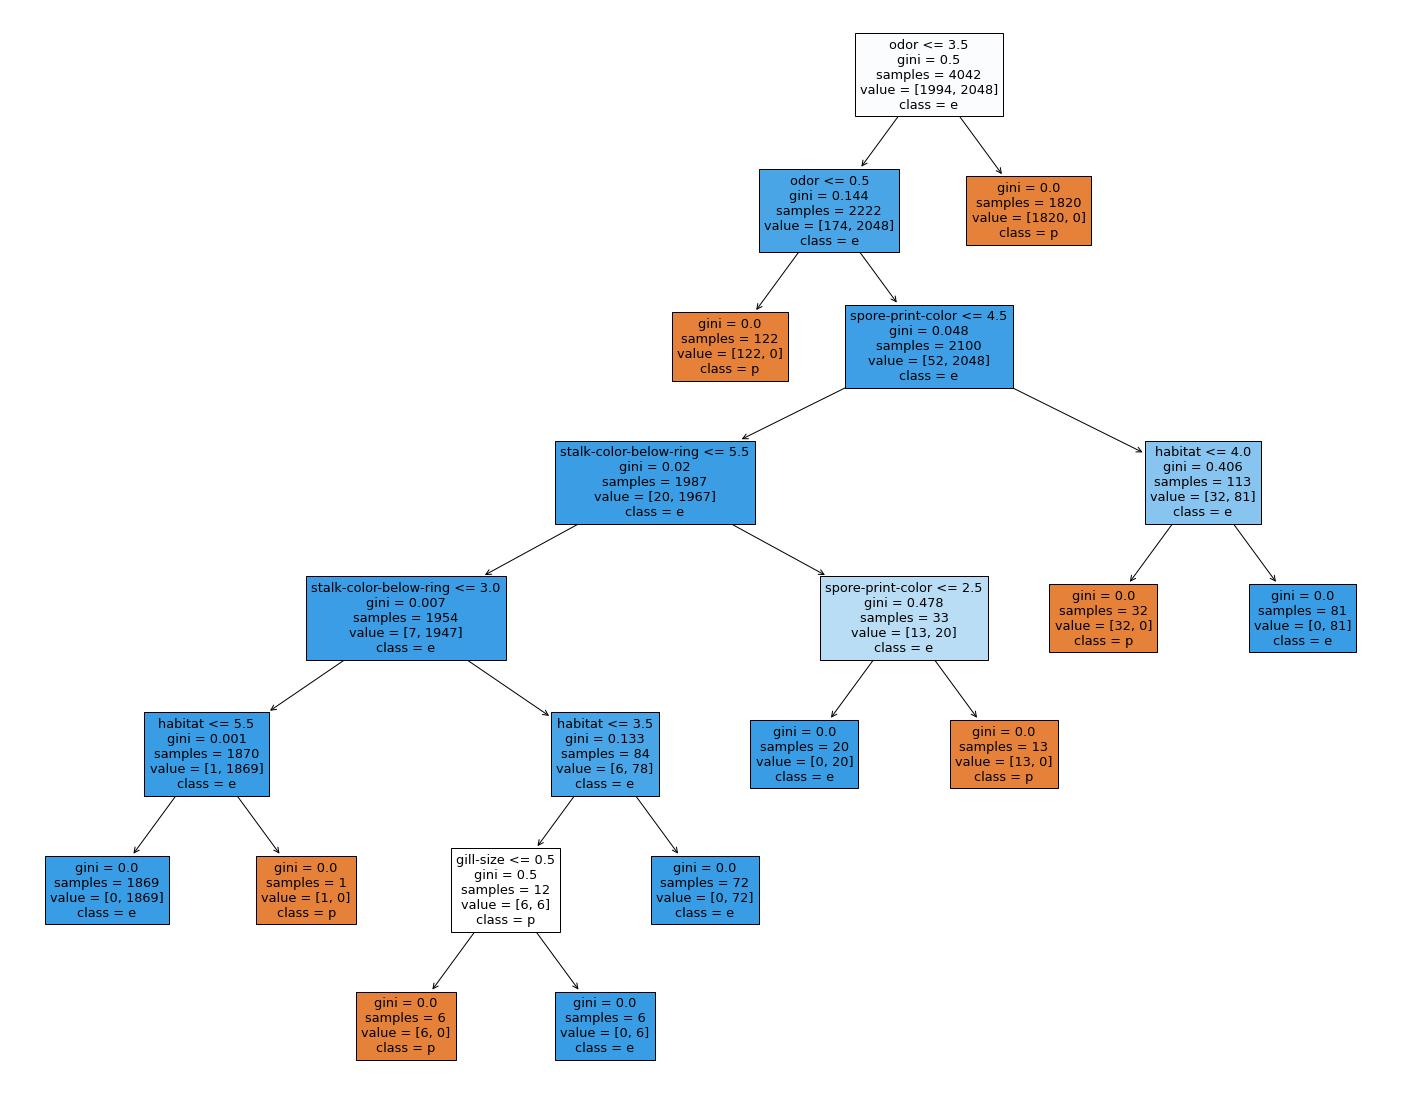

In [12]:
features = list(df_nums_smooth.columns)
features.remove('class')

x_train, x_test, y_train, y_test = train_test_split(df_nums_smooth[features], df_nums_smooth['class'], test_size=0.5)

clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)

res = pd.DataFrame({'predicted': y_predicted, 'real': y_test})
print(res)

print("Accuracy: ", accuracy_score(y_predicted, y_test))

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=df.drop('class', axis=1).columns, class_names=df['class'].unique(), filled=True)

# Building RandomForest

In [13]:
clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators = 2)
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)

res = pd.DataFrame({'predicted': y_predicted, 'real': y_test})
print(res)

print("Accuracy: ", accuracy_score(y_predicted, y_test))

      predicted  real
1422          1     1
953           1     1
2293          1     1
4791          0     0
2696          1     1
...         ...   ...
3884          1     1
6837          1     1
35            1     1
7742          0     0
5018          0     0

[4042 rows x 2 columns]
Accuracy:  0.9534883720930233
